# –í–æ—Ä–∫—à–æ–ø: agentic reasoning –Ω–∞ langgraph
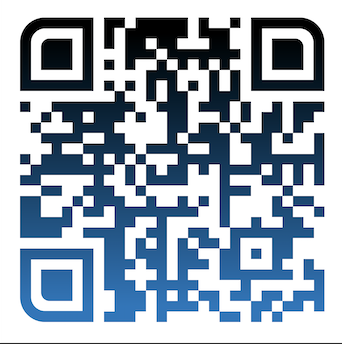

https://github.com/Rai220/workshops

In [ ]:
# !pip install langchain langchain_gigachat langchain_community langgraph langchain_chroma langchain_openai tavily-python rich python-dotenv nest_asyncio pyppeteer -q

In [3]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser, StrOutputParser
from langgraph.graph import END, START, MessagesState, StateGraph
from typing import List
from langgraph.types import Command
from pydantic import BaseModel, Field
from dotenv import load_dotenv, find_dotenv

import time

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ GigaChat Max 2
–ü–æ–ª—É—á–∏—Ç—å API –∫–ª—é—á–∏ –¥–ª—è –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è –∏ 1 –º–ª–Ω —Ç–æ–∫–µ–Ω–æ–≤ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å GigaChat –º–æ–∂–Ω–æ —Ç—É—Ç.

–ü–µ—Ä–µ–∏–º–µ–Ω—É–π—Ç–µ —Ñ–∞–π–ª .env.example –≤ .env –∏ –Ω–∞—Å—Ç—Ä–æ–π—Ç–µ –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–æ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –¥–æ—Å—Ç—É–ø–∞ –∫ GigaChat.

In [27]:
# –ó–∞–¥–∞–π—Ç–µ –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–æ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è –∫ GigaChat.
# –í—ã —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ —Å–ø–æ—Å–æ–±—ã –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏.
# –ü–æ–¥—Ä–æ–±–Ω–µ–µ –æ —Å–ø–æ—Å–æ–±–∞—Ö –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Å–º. –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫ –ø–∞–∫–µ—Ç gigachat:
# https://github.com/ai-forever/gigachat
load_dotenv(find_dotenv())

from langchain_gigachat.chat_models.gigachat import GigaChat

# LLM GigaChat
giga = GigaChat(model="GigaChat-2-Max",
                verify_ssl_certs=False,
                profanity_check=False,
                # base_url="https://gigachat.sberdevices.ru/v1",
                base_url="https://gigachat.ift.sberdevices.ru/v1",
                # top_p=1,
                streaming=False,
                max_tokens=8000,
                temperature=1,
                timeout=600)

giga_lite = GigaChat(model="GigaChat",
                verify_ssl_certs=False,
                profanity_check=False,
                # base_url="https://gigachat.sberdevices.ru/v1",
                base_url="https://gigachat.ift.sberdevices.ru/v1",
                # top_p=1,
                streaming=False,
                max_tokens=8000,
                temperature=1,
                timeout=600)

In [5]:
giga.invoke("–ü—Ä–∏–≤–µ—Ç")

AIMessage(content='–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ö–∞–∫ –≤–∞—à–∏ –¥–µ–ª–∞?', additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 14, 'completion_tokens': 7, 'total_tokens': 21, 'precached_prompt_tokens': 0}, 'model_name': 'GigaChat-2-Max:2.0.27.04', 'x_headers': {'x-request-id': '84029dd5-071e-4e74-9bd8-d983ced9ed80', 'x-session-id': '70a821f3-1d8f-4563-a5b8-fd00b6e1ada1', 'x-client-id': None}, 'finish_reason': 'stop'}, id='84029dd5-071e-4e74-9bd8-d983ced9ed80')

# –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–∏–º–µ—Ä - –±–∞–Ω–∫–æ–≤—Å–∫–∏–π –∞–≥–µ–Ω—Ç
## –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –∞–≥–µ–Ω—Ç–∞

In [6]:
from langchain.agents import tool
from typing import Dict, Literal
from langgraph.checkpoint.memory import MemorySaver

cards_db = {
    "2202208XXXX11824": {"type": "–ú–ò–†", "blocked": False},
    "4508103XXXX14732": {"type": "VISA", "blocked": False},
}

@tool
def get_cards() -> dict:
    """–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–æ—Å—Ç–æ—è–Ω–∏–µ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –∫–∞—Ä—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ –≤–∏–¥–µ dict, –≥–¥–µ –∫–ª—é—á–µ–º —è–≤–ª—è–µ—Ç—Å—è id –∫–∞—Ä—Ç—ã"""
    print(">>> called get_cards")
    return cards_db

@tool
def block_card(card_id: str, reason: Literal["lost", "not_used", "stolen"]) -> str:
    """–ë–ª–æ–∫–∏—Ä—É–µ—Ç –∫–∞—Ä—Ç—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø–æ –Ω–æ–º–µ—Ä—É –∫–∞—Ä—Ç—ã (card_id).
–û–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —É—Ç–æ—á–Ω–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–∏—á–∏–Ω—É –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏ –∫–∞—Ä—Ç—ã.
reason - –ø—Ä–∏—á–∏–Ω–∞ –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏."""
    print(f">>> called block_card({card_id}, {reason})")
    if card_id in cards_db:
      cards_db[card_id]["block"] = True
      return f"–ö–∞—Ä—Ç–∞ {card_id} —É—Å–ø–µ—à–Ω–æ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∞"
    else:
      return f"–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞ {card_id}"

## –ö–æ–¥ ReAct –∞–≥–µ–Ω—Ç–∞

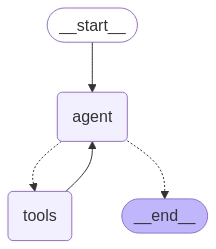

In [8]:
from langgraph.prebuilt import create_react_agent

system = """–¢—ã –ø–æ–ª–µ–∑–Ω—ã–π –±–∞–Ω–∫–æ–≤—Å–∫–∏–π –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–º–æ–≥–∞–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ä—Ç–∞–º–∏ –±–∞–Ω–∫–∞.
–ï—Å–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ø—Ä–æ—Å–∏—Ç –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ä—Ç—É, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —É—Ç–æ—á–Ω–∏ —É –Ω–µ–≥–æ –ø—Ä–∏—á–∏–Ω—É –±–ª–æ–∫–∏—Ä–æ–≤–∫–∏.
"""

agent = create_react_agent(giga, tools=[get_cards, block_card], checkpointer=MemorySaver(), prompt=system)
agent

In [9]:
import uuid

config = {"configurable": {"thread_id": str(uuid.uuid4())}}

while True:
  query = input("User: ")
  if query == "" or query == "q":
    break
  print(f"User: {query}")
  resp = agent.invoke({"messages": [{"role": "human", "content": query}]}, config)
  print(f'Bot: {resp["messages"][-1].content}')
  time.sleep(0.5) # For corrent output in jupyter

User: –ü—Ä–∏–≤–µ—Ç
Bot: –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ö–∞–∫ —è –º–æ–≥—É –ø–æ–º–æ—á—å –≤–∞–º —Å–µ–≥–æ–¥–Ω—è?
User: –Ø –ø–æ—Ç–µ—Ä—è–ª –≤—Å–µ —Å–≤–æ–∏ –∫–∞—Ä—Ç—ã
Bot: –°–æ–∂–∞–ª–µ—é —ç—Ç–æ —É—Å–ª—ã—à–∞—Ç—å. –Ø –º–æ–≥—É –ø–æ–º–æ—á—å –í–∞–º –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å –í–∞—à–∏ –∫–∞—Ä—Ç—ã –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –Ω–µ—Å–∞–Ω–∫—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è. –ú–æ–≥—É –ª–∏ —è –ø–æ–ª—É—á–∏—Ç—å –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ, —á—Ç–æ –í—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ç–∏—Ç–µ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –í–∞—à–∏ –∫–∞—Ä—Ç—ã –∏–∑-–∑–∞ –∏—Ö –ø–æ—Ç–µ—Ä–∏?
User: –î–∞, –¥–∞–≤–∞–π –±–ª–æ–∫–∏—Ä—É–π –≤—Å–µ —á—Ç–æ –µ—Å—Ç—å
>>> called get_cards
Bot: –£ –í–∞—Å –µ—Å—Ç—å –¥–≤–µ –∞–∫—Ç–∏–≤–Ω—ã–µ –∫–∞—Ä—Ç—ã:
–ö–∞—Ä—Ç–∞ –ú–ò–† ****11824
–ö–∞—Ä—Ç–∞ VISA ****14732

–í—ã —É–≤–µ—Ä–µ–Ω—ã, —á—Ç–æ —Ö–æ—Ç–∏—Ç–µ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞—Ç—å –æ–±–µ —ç—Ç–∏ –∫–∞—Ä—Ç—ã –ø–æ –ø—Ä–∏—á–∏–Ω–µ —É—Ç—Ä–∞—Ç—ã?
User: –¥–∞
>>> called block_card(2202208XXXX11824, lost)
>>> called block_card(4508103XXXX14

# –û–ø–∏—Å–∞–Ω–∏–µ –∞–≥–µ–Ω—Ç–æ–≤ (—Ä–æ–ª–µ–π)
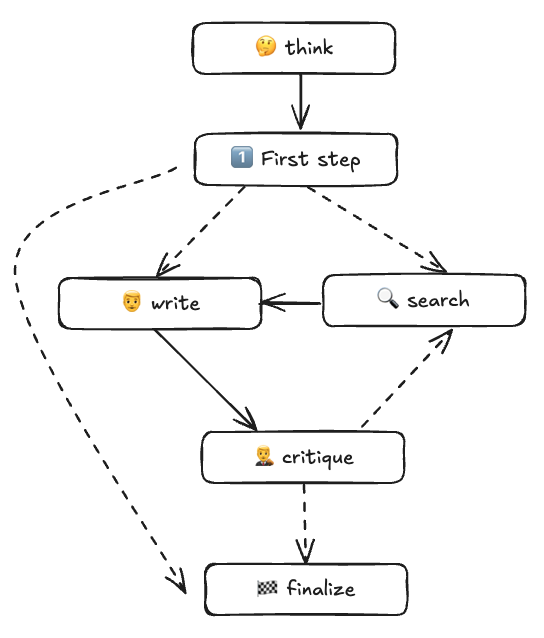

## –ì–ª–∞–≤–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –≥—Ä–∞—Ñ–∞ (state)

–û–±—â–∞—è –ø–∞–º—è—Ç—å –¥–ª—è –≤—Å–µ—Ö –∞–≥–µ–Ω—Ç–æ–≤. –ó–¥–µ—Å—å —Ö—Ä–∞–Ω–∏—Ç—Å—è –∏—Å—Ç–æ—Ä–∏—è —Å–æ–æ–±—â–µ–Ω–∏–π –∏ –¥—Ä—É–≥–∏–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—è–≤–ª—è—é—Ç—Å—è –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ —Ä–∞–±–æ—Ç—ã.

- –ü—Ä–∏ —Å—Ç–∞—Ä—Ç–µ –∞–≥–µ–Ω—Ç–∞ –æ–Ω –ø–æ–ª—É—á–∞–µ—Ç –≤—Å–µ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ (–∏–ª–∏ –∏—Ö —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö)
- –ü–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–∞–±–æ—Ç—ã –∞–≥–µ–Ω—Ç –º–æ–∂–µ—Ç –∏–∑–º–µ–Ω–∏—Ç—å –ø–æ–ª—è —Å—Ç–µ–π—Ç–∞


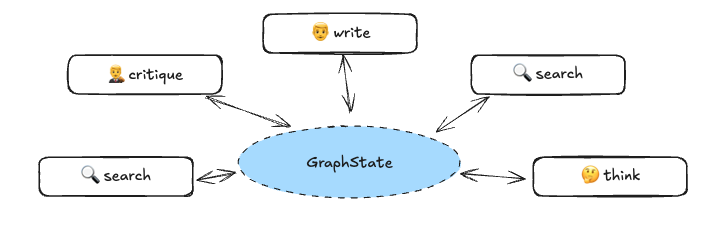

In [11]:
class ReasoningState(MessagesState):
  last_reason: str
  user_question: str
  last_answer: str
  critique: List[str]
  final_decision: str
  final_answer: str
  search_query: str
  search_results: Dict
  
MAIN_TEMPLATE = f"""–¢—ã - –ò–ò –ê—Å—Å–∏—Å—Ç–µ–Ω—Ç –Ω–∞ –±–∞–∑–µ GigaChat.
–¢–≤–æ—è –∑–∞–¥–∞—á–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
–°–µ–≥–æ–¥–Ω—è—à–Ω—è—è –¥–∞—Ç–∞ - {time.strftime('%Y-%m-%d')}

"""

## –ê–≥–µ–Ω—Ç-—Ä–∏–∑–æ–Ω–µ—Ä

In [12]:
REASONER_TEMPLATE = MAIN_TEMPLATE + """–î—É–º–∞–π –∫–∞–∫ –∞–Ω–∞–ª–∏—Ç–∏–∫, –∫–æ—Ç–æ—Ä—ã–π –æ–±–¥—É–º—ã–≤–∞–µ—Ç –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø–µ—Ä–µ–¥ —Ç–µ–º, –∫–∞–∫ –Ω–∞—á–∞—Ç—å –æ—Ç–≤–µ—á–∞—Ç—å –Ω–∞ –Ω–µ–≥–æ.
–ù–∞–ø–∏—à–∏ —Å–≤–æ–∏ –º—ã—Å–ª–∏ –æ —Ç–æ–º, –∫–∞–∫ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
–ü–æ–¥—É–º–∞–π, –ø–æ—á–µ–º—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –∑–∞–¥–∞–µ—Ç —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å.
–ö–∞–∫ —Ç—ã –º–æ–∂–µ—à—å –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –Ω–µ–≥–æ –Ω–∞–∏–ª—É—á—à–∏–º –æ–±—Ä–∞–∑–æ–º?
–ß—Ç–æ –∏–º–µ–Ω–Ω–æ –Ω—É–∂–Ω–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é? –≠—Ç–æ—Ç –ª–∏ –≤–æ–ø—Ä–æ—Å –æ–Ω –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —Ö–æ—Ç–µ–ª –∑–∞–¥–∞—Ç—å? –ù–∞–ø–∏—à–∏ —Å–≤–æ–∏ –º—ã—Å–ª–∏ –ø–æ —ç—Ç–∏–º –≤–æ–ø—Ä–æ—Å–∞–º.
–£—á—Ç–∏, —á—Ç–æ —É —Ç–µ–±—è –±—É–¥–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø–æ–∏—Å–∫–æ–º –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ, —Ç–∞–∫ —á—Ç–æ —É—á–∏—Ç—ã–≤–∞–π —ç—Ç–æ –ø—Ä–∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏. –ù–æ –Ω–µ –∏—â–∏ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –≤ —Å–∏—Ç—É–∞—Ü–∏–∏, –µ—Å–ª–∏ —Ç—ã —Å–∞–º –∑–Ω–∞–µ—à—å –æ—Ç–≤–µ—Ç.

–í–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - {user_question}
"""

def reason(state: ReasoningState):
    prompt = ChatPromptTemplate.from_messages([
        ("system", REASONER_TEMPLATE)
    ])

    chain = prompt | giga | StrOutputParser()

    res = chain.invoke(
        {
            "user_question": state['user_question'],
        }
    )

    return {"last_reason": res}

## –ê–≥–µ–Ω—Ç –≤—ã–±–æ—Ä–∞ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞

In [ ]:
class FirstStep(BaseModel):
    """–û–ø–∏—Å–∞–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞ –¥–ª—è –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è"""
    search_query: str = Field(description="–¢–µ–∫—Å—Ç –ø–æ–∏—Å–∫–æ–≤–æ–≥–æ –∑–∞–ø—Ä–æ—Å–∞ –Ω–∞ –ø–æ–∏—Å–∫ –¥–∞–Ω–Ω—ã—Ö –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ, –µ—Å–ª–∏ –Ω—É–∂–µ–Ω")
    final_decision: str = Field(description="–ò—Ç–æ–≥–æ–≤–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –æ–¥–Ω–æ –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö: ")


FIRST_STEP_TEMPLATE = MAIN_TEMPLATE + """–î—É–º–∞–π –∫–∞–∫ –∞–≥–µ–Ω—Ç-–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –¥–æ–ª–∂–µ–Ω –æ–ø—Ä–µ–¥–ª–∏—Ç—å –∫–∞–∫–æ–π –ø–µ—Ä–≤—ã–π —à–∞–≥ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –¥–ª—è –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
–¢—ã –¥–æ–ª–∂–µ–Ω –≤—ã–±—Ä–∞—Ç—å, –∫–∞–∫–æ–π –∞–≥–µ–Ω—Ç –¥–æ–ª–∂–µ–Ω –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å —Ä–∞–±–æ—Ç—É –Ω–∞–¥ –≤–æ–ø—Ä–æ—Å–æ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

–í–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - {user_question}

–¢–≤–æ–∏ –º—ã—Å–ª–∏ –ø–æ –ø–æ–≤–æ–¥—É –≤–æ–ø—Ä–æ—Å–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:
<THINK>
{last_reason}
</THINK>

–í—ã–±—Ä–∞—Ç—å –Ω—É–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π —à–∞–≥ - –∫–∞–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é –≤—ã–∑–≤–∞—Ç—å, —á—Ç–æ–±—ã –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –Ω–∞–∏–ª—É—á—à–∏–º –æ–±—Ä–∞–∑–æ–º.
1. finalize - –æ—Ç–≤–µ—Ç–∏—Ç –∞–≥–µ–Ω—Ç-—Ñ–∏–Ω–∞–ª–∏–∑–∞—Ü—Ç–æ—Ä, —Ç–∞–∫ –∫–∞–∫ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ—Ç–≤–µ—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å —É–∂–µ –µ—Å—Ç—å –∏–ª–∏ –≤–æ–ø—Ä–æ—Å –ø—Ä–æ—Å—Ç–æ–π –∏ –ø–æ–Ω—è—Ç–Ω—ã–π –∏ –º—ã –≥–æ—Ç–æ–≤—ã –æ—Ç–≤–µ—Ç–∏—Ç—å.
2. search - –¥–æ–ª–∂–µ–Ω –æ—Ç—Ä–∞–±–æ—Ç–∞—Ç—å –∞–≥–µ–Ω—Ç-–ø–æ–∏—Å–∫–æ–≤–∏–∫
3. writer - —Ç—Ä–µ–±—É–µ—Ç—Å—è —Ä–∞–±–æ—Ç–∞ –∞–≥–µ–Ω—Ç–∞-–ø–æ–º–æ—à–Ω–∏–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞–ø–∏—à–µ—Ç –ø–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç–≤–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω –∫—Ä–∏—Ç–∏–∫–æ–º.

–í—ã–≤–µ–¥–∏ —Ç–æ–ª—å–∫–æ —Å–ª–µ–¥—É—é—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ —Ñ–æ—Ä–º–∞—Ç–µ JSON:
{format_instructions}"""


def first_step(state: ReasoningState) -> Command[Literal["üîç search", "üë® write", "üèÅ finalize"]]:
    parser = PydanticOutputParser(pydantic_object=FirstStep)
    prompt = ChatPromptTemplate.from_messages([
        ("system", FIRST_STEP_TEMPLATE)
    ]).partial(format_instructions=parser.get_format_instructions())

    chain = prompt | giga_lite | parser

    res = chain.invoke(
        {
            "user_question": state["user_question"],
            "last_reason": state["last_reason"],
        }
    )

    final_decision = res.final_decision
    search_query = res.search_query
    update = {"final_decision": final_decision, "search_query": search_query}
    goto = "üèÅ finalize"

    if final_decision == "search" and search_query is not None and len(search_query) > 0:
        goto = "üîç search"
    if final_decision == "writer":
        goto = "üë® write"

    return Command(
        update=update,
        goto=goto
    )

## –ì–ª–∞–≤–Ω—ã–π –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç

In [14]:
ANSWER_TEMPLATE = MAIN_TEMPLATE + """–î—É–º–∞–π –∫–∞–∫ –∞–≥–µ–Ω—Ç-–ø–æ–º–æ—â–Ω–∏–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.
–¢–≤–æ—è –∑–∞–¥–∞—á–∞ - –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ò–∑—É—á–∏ —Å–≤–æ–∏ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º—ã—Å–ª–∏ –∏ –æ—Ç–≤–µ—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é –Ω–∞ –µ–≥–æ –≤–æ–ø—Ä–æ—Å —Å —É—á–µ—Ç–æ–º —Å–≤–æ–∏—Ö –º—ã—Å–ª–µ–π.
–ò–ª–∏, –µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–∏—Å–∫, –Ω–∞–ø–∏—à–∏, —á—Ç–æ –Ω—É–∂–Ω–æ —Å–Ω–∞—á–∞–ª–∞ –≤–æ–ø—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø–æ–∏—Å–∫–æ–º, —É —Ç–µ–±—è –±—É–¥–µ—Ç –≤–æ–∑–º–æ–Ω–æ—Å—Ç—å –æ—Ç–≤–µ—Ç–∏—Ç—å –ø–æ—Å–ª–µ.

–í–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - {user_question}

–¢–≤–æ–∏ –º—ã—Å–ª–∏ –ø–æ –ø–æ–≤–æ–¥—É –≤–æ–ø—Ä–æ—Å–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:
<THINK>
{last_reason}
</THINK>

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∏—Å–∫–∞ (–µ—Å–ª–∏ –µ—Å—Ç—å):
<SEARCH_RESULTS>
{search_results}
</SEARCH_RESULTS>

–¢–µ–ø–µ—Ä—å –æ—Ç–≤–µ—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é:
"""

def answer(state: ReasoningState):
    prompt = ChatPromptTemplate.from_messages([
        ("system", ANSWER_TEMPLATE)
    ])

    chain = prompt | giga | StrOutputParser()

    res = chain.invoke(
        {
            "user_question": state["user_question"],
            "last_reason": state["last_reason"],
            "search_results": state.get("search_results", {})
        }
    )

    return {"last_answer": res}

## –ê–≥–µ–Ω—Ç-–∫—Ä–∏—Ç–∏–∫

In [15]:
class Critique(BaseModel):
    """–ö—Ä–∏—Ç–∏–∫–∞ –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏—è"""

    thoughts: str = Field(description="–ú—ã—Å–ª–∏ –ø–æ –ø–æ–≤–æ–¥—É –æ—Ç–≤–µ—Ç–∞")
    critique: str = Field(description="–ö–æ–Ω—Å—Ç—Ä—É–∫—Ç–∏–≤–Ω–∞—è –∫—Ä–∏—Ç–∏–∫–∞ –æ—Ç–≤–µ—Ç–∞ - —á—Ç–æ –Ω—É–∂–Ω–æ –ø–æ–ø—Ä–∞–≤–∏—Ç—å –∏–ª–∏ –¥–æ—Ä–∞–±–æ—Ç–∞—Ç—å")
    search_query: str = Field(description="–¢–µ–∫—Å—Ç –ø–æ–∏—Å–∫–æ–≤–æ–≥–æ –∑–∞–ø—Ä–æ—Å–∞ –Ω–∞ –ø–æ–∏—Å–∫ –¥–∞–Ω–Ω—ã—Ö –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ, –µ—Å–ª–∏ –Ω—É–∂–µ–Ω")
    final_decision: str = Field(description="–ò—Ç–æ–≥–æ–≤–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –æ–¥–Ω–æ –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö: good (–µ—Å–ª–∏ –Ω–µ—Ç –Ω–æ–≤–æ–π –∫—Ä–∏—Ç–∏–∫–∏, –µ—Å—Ç—å –æ—Ç—Ä—ã–≤–∫–∏ –∏–∑ –∫–Ω–∏–≥ –∏ —Ä–µ—á—å –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –Ω–∞–ø–∏—Å–∞–Ω–æ–π), search (—Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–∏—Å–∫ –¥–∞–Ω–Ω—ã—Ö –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ), fix (–µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å –∏–ª–∏ –¥–æ—Ä–∞–±–æ—Ç–∞—Ç—å –æ—Ç–≤–µ—Ç)")



CRITIQUE_TEMPLATE = MAIN_TEMPLATE + """–î—É–º–∞–π –∫–∞–∫ –∞–≥–µ–Ω—Ç-–∫—Ä–∏—Ç–∏–∫. –¢–≤–æ—è –∑–∞–¥–∞—á–∞ - –æ—Ü–µ–Ω–∏—Ç—å –æ—Ç–≤–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –ø—Ä–∏–Ω—è—Ç—å —Ä–µ—à–µ–Ω–∏–µ - —á—Ç–æ —Å –Ω–∏–º –¥–µ–ª–∞—Ç—å.
–û—Ç–≤–µ—á–∞—Ç—å, –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å, –∑–∞–ø—Ä–æ—Å–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –∑–∞–ø—Ä–æ—Å–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ.
–ï—Å–ª–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –æ—Ç–≤–µ—Ç–∞ –Ω—É–∂–µ–Ω –ø–æ–∏—Å–∫ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ - –ø—Ä–∏–º–∏ —Ä–µ—à–µ–Ω–∏–µ search –∏ –ø–æ–∏—Å–∫ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω.

–í–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - {user_question}

–¢–≤–æ–∏ –º—ã—Å–ª–∏ –ø–æ –ø–æ–≤–æ–¥—É –≤–æ–ø—Ä–æ—Å–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:
<THINK>
{last_reason}
</THINK>

–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π –æ—Ç–≤–µ—Ç:
<LAST_ANSWER>
{last_answer}
</LAST_ANSWER>

–ü—Ä–µ–¥—ã–¥—É—â–∏–π –Ω–∞–±–æ—Ä –∫—Ä–∏—Ç–∏–∫–∏, –∫–æ—Ç–æ—Ä—É—é —Ç—ã —É–∂–µ –ø–∏—Å–∞–ª —Ä–∞–Ω—å—à–µ (–Ω–µ –ø–æ–≤—Ç–æ—Ä—è–π—Å—è):
<OLD_CRITIQUE>
{old_critique}
</OLD_CRITIQUE>

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∏—Å–∫–∞ (–µ—Å–ª–∏ –µ—Å—Ç—å):
<SEARCH_RESULTS>
{search_results}
</SEARCH_RESULTS>

–í—ã–≤–µ–¥–∏ —Ç–æ–ª—å–∫–æ —Å–ª–µ–¥—É—é—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ —Ñ–æ—Ä–º–∞—Ç–µ JSON:
{format_instructions}"""


def critique(state: ReasoningState) -> Command[Literal["üîç search", "üèÅ finalize", END]]:
    parser = PydanticOutputParser(pydantic_object=Critique)
    prompt = ChatPromptTemplate.from_messages([
        ("system", CRITIQUE_TEMPLATE)
    ]).partial(format_instructions=parser.get_format_instructions())

    chain = prompt | giga | parser

    res = chain.invoke(
        {
            "user_question": state["user_question"],
            "last_reason": state["last_reason"],
            "last_answer": state.get("last_answer", ""),
            "old_critique": state.get("critique", []),
            "search_results": state.get("search_results", {})
        }
    )

    final_decision = res.final_decision
    critique = res.critique
    search_query = res.search_query
    new_critique = state.get("critique", [])
    if new_critique is None:
        new_critique = []
    new_critique = new_critique.append(critique)


    update = {"final_decision": final_decision, "critique": new_critique, "search_query": search_query}
    goto = "üèÅ finalize"

    if final_decision == "search" and search_query is not None and len(search_query) > 0:
        goto = "üîç search"

    return Command(
        update=update,
        goto=goto
    )

## –ê–≥–µ–Ω—Ç-—Ñ–∏–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä

In [17]:
FINALIZER_TEMPLATE = MAIN_TEMPLATE + """–î—É–º–∞–π –∫–∞–∫ –∞–≥–µ–Ω—Ç-–≤—ã–ø—É—Å–∫–∞—é—â–∏–π —Ä–µ–¥–∞–∫—Ç–æ—Ä.
–¢–≤–æ—è –∑–∞–¥–∞—á–∞ - –Ω–∞–ø–∏—Å–∞—Ç—å –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –æ—Ç–≤–µ—Ç —Å —É—á–µ—Ç–æ–º –∫—Ä–∏—Ç–∏–∫–∏ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –æ—Ç–≤–µ—Ç–æ–≤ –∏ —Ä–∞–∑–º—ã—à–ª–µ–Ω–∏–π.

–í–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - {user_question}

–¢–≤–æ–∏ –º—ã—Å–ª–∏ –ø–æ –ø–æ–≤–æ–¥—É –≤–æ–ø—Ä–æ—Å–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:
<THINK>
{last_reason}
</THINK>

–ü–µ—Ä–≤–∞—è –≤–µ—Ä—Å–∏—è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–æ–≥–æ –æ—Ç–≤–µ—Ç–∞:
<LAST_ANSWER>
{last_answer}
</LAST_ANSWER>

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∏—Å–∫–∞ (–µ—Å–ª–∏ –µ—Å—Ç—å):
<SEARCH_RESULTS>
{search_results}
</SEARCH_RESULTS>

–ö—Ä–∏—Ç–∏–∫–∞ —ç—Ç–æ–π –≤–µ—Ä—Å–∏–∏ –æ—Ç–≤–µ—Ç–∞:
<CRITICUE>
{critique}
</CRITICUE>

–ù–∞–ø–∏—à–∏ —Ñ–∏–Ω–∞–ª—å–Ω—É—é –≤–µ—Ä—Å–∏—é –æ—Ç–≤–µ—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é (—á–µ—Ç–∫–æ –∏ —è—Å–Ω–æ):
"""

def finalize(state: ReasoningState):
    prompt = ChatPromptTemplate.from_messages([
        ("system", FINALIZER_TEMPLATE)
    ])

    chain = prompt | giga | StrOutputParser()

    res = chain.invoke(
        {
            "user_question": state["user_question"],
            "last_reason": state["last_reason"],
            "critique": state.get("critique", ""),
            "last_answer": state.get("last_answer", ""),
            "search_results": state.get("search_results", {})
        }
    )

    return {"final_answer": res}

## –ü–æ–∏—Å–∫–æ–≤–∏–∫-—Å–∫—Ä–∞–ø–µ—Ä

In [18]:
from tavily import TavilyClient

def search(state: ReasoningState):
    tavily_client = TavilyClient()
    response = tavily_client.search(state["search_query"])
    search_results = state.get("search_results", {})
    search_results[state["search_query"]] = response
    return {"search_results": search_results}

## –°–±–æ—Ä–∫–∞ –≥—Ä–∞—Ñ–∞

In [20]:
graph = StateGraph(ReasoningState)

graph.add_node("ü§î think", reason)
graph.add_node("1Ô∏è‚É£ First step", first_step)
graph.add_node("üë® write", answer)
graph.add_node("üë®‚Äç‚öñÔ∏è critique", critique)
graph.add_node("üîç search", search)
graph.add_node("üèÅ finalize", finalize)

graph.add_edge(START, "ü§î think")
graph.add_edge("ü§î think", "1Ô∏è‚É£ First step")
graph.add_edge("üë® write", "üë®‚Äç‚öñÔ∏è critique")
graph.add_edge("üîç search", "üë® write")
graph.add_edge("üèÅ finalize", END)



app = graph.compile()

# –ó–∞–ø—É—Å–∫ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏

In [26]:
import uuid

inputs = {"user_question": "–ß—Ç–æ –Ω–æ–≤–æ–≥–æ –≤ –º–æ–¥–µ–ª–∏ GigaChat-2"}
config = {"configurable": {"thread_id": str(uuid.uuid4())}}

start = time.time()
async for event in app.astream_events(inputs, version="v2"):
  event_type = event.get('event', None)
  agent = event.get('name', '')
  if agent in ["_write", "RunnableSequence", "__start__", "__end__", "LangGraph"]:
    continue
  if event_type == 'on_chat_model_stream':
    print(event['data']['chunk'].content, end='')
  elif event_type == 'on_chain_start':
    print(f"<{agent}>")
  elif event_type == 'on_chain_end':
    print(f"</{agent}>")
  # else:
   #print(event)

<ü§î think>
–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Ö–æ—á–µ—Ç —É–∑–Ω–∞—Ç—å –æ –Ω–æ–≤—ã—Ö —Ñ—É–Ω–∫—Ü–∏—è—Ö –∏–ª–∏ —É–ª—É—á—à–µ–Ω–∏—è—Ö, –≤–Ω–µ—Å–µ–Ω–Ω—ã—Ö –≤–æ –≤—Ç–æ—Ä—É—é –≤–µ—Ä—Å–∏—é –º–æ–¥–µ–ª–∏ GigaChat (–ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Å–ª–µ –≤–µ—Ä—Å–∏–∏, –∫–æ—Ç–æ—Ä—É—é —è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é). –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –∑–∞–ø—Ä–æ—Å, –∫–æ–≥–¥–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç—Å—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è–º–∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π, –æ—Å–æ–±–µ–Ω–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–º –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç–æ–º –∏ –º–∞—à–∏–Ω–Ω—ã–º –æ–±—É—á–µ–Ω–∏–µ–º. –í–æ–∑–º–æ–∂–Ω–æ, —á–µ–ª–æ–≤–µ–∫ —Å–ª–µ–¥–∏—Ç –∑–∞ —Ä–∞–∑–≤–∏—Ç–∏–µ–º –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –∏ –∏—â–µ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è, —Ç–∞–∫–∏–µ –∫–∞–∫ –Ω–æ–≤—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞–ø—Ä–æ—Å–æ–≤, —É–ª—É—á—à–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –æ—Ç–≤–µ—Ç–æ–≤, —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –¥—Ä—É–≥–∏–µ –∞—Å–ø–µ–∫—Ç—ã.

–î–ª—è –æ—Ç–≤–µ—Ç–∞ –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å –º–Ω–µ –ø–æ—

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ Arize Phoenix

In [ ]:
# !pip install arize-phoenix opentelemetry-exporter-otlp openinference-instrumentation-langchain -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [24]:
import phoenix as px
# session = px.launch_app(use_temp_dir=False) # Fo colab
session = px.launch_app()

/Users/knkrestnikov/Documents/giga/workshops/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


üåç To view the Phoenix app in your browser, visit http://localhost:6006/
üìñ For more information on how to use Phoenix, check out https://docs.arize.com/phoenix


In [25]:
from phoenix.otel import register
from openinference.instrumentation.langchain import LangChainInstrumentor

tracer_provider = register(
  project_name="Agentic reasoning", # Default is 'default'
  endpoint="http://localhost:4317",
)

LangChainInstrumentor().instrument(tracer_provider=tracer_provider)

üî≠ OpenTelemetry Tracing Details üî≠
|  Phoenix Project: Agentic reasoning
|  Span Processor: SimpleSpanProcessor
|  Collector Endpoint: localhost:4317
|  Transport: gRPC
|  Transport Headers: {'user-agent': '****'}
|  
|  Using a default SpanProcessor. `add_span_processor` will overwrite this default.
|  
|  `register` has set this TracerProvider as the global OpenTelemetry default.
|  To disable this behavior, call `register` with `set_global_tracer_provider=False`.

